In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
import glob as gb

import matplotlib.pyplot as plt

In [2]:
file_path = "/home/milan/Desktop/Ys_PCE/data/training_setA/training/*.psv"
finaldata = pd.concat([pd.read_csv(file,sep="|") for file in gb.glob(file_path)])

In [3]:
finaldata.shape

(790215, 41)

In [4]:
finaldata.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

In [5]:
missing_data = finaldata.isna()
missing_data.any(axis=0) #790215

HR                   True
O2Sat                True
Temp                 True
SBP                  True
MAP                  True
DBP                  True
Resp                 True
EtCO2                True
BaseExcess           True
HCO3                 True
FiO2                 True
pH                   True
PaCO2                True
SaO2                 True
AST                  True
BUN                  True
Alkalinephos         True
Calcium              True
Chloride             True
Creatinine           True
Bilirubin_direct     True
Glucose              True
Lactate              True
Magnesium            True
Phosphate            True
Potassium            True
Bilirubin_total      True
TroponinI            True
Hct                  True
Hgb                  True
PTT                  True
WBC                  True
Fibrinogen           True
Platelets            True
Age                 False
Gender              False
Unit1                True
Unit2                True
HospAdmTime 

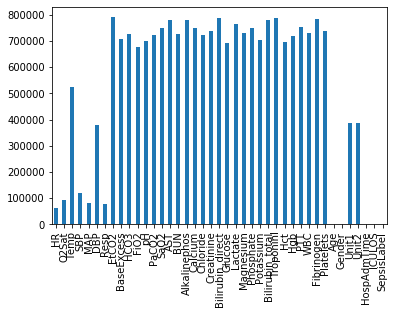

In [6]:
missing_data.sum(axis=0).plot.bar()

In [7]:
missingpercentage = missing_data.sum(axis=0)/finaldata.shape[0]
missingpercentage

HR                  0.077433
O2Sat               0.120320
Temp                0.662243
SBP                 0.152112
MAP                 0.102324
DBP                 0.481258
Resp                0.097768
EtCO2               1.000000
BaseExcess          0.895749
HCO3                0.919494
FiO2                0.858070
pH                  0.885329
PaCO2               0.912318
SaO2                0.950444
AST                 0.985042
BUN                 0.918407
Alkalinephos        0.985407
Calcium             0.950244
Chloride            0.916761
Creatinine          0.933579
Bilirubin_direct    0.998504
Glucose             0.877684
Lactate             0.965651
Magnesium           0.922197
Phosphate           0.949512
Potassium           0.891376
Bilirubin_total     0.987734
TroponinI           0.998779
Hct                 0.882237
Hgb                 0.911643
PTT                 0.951525
WBC                 0.924896
Fibrinogen          0.992369
Platelets           0.934829
Age           

In [8]:
#rowwise na analysis
missing_data.any(axis=1).sum()

790215

In [9]:
finaldata.shape

(790215, 41)

In [10]:
#Leaving column which as missing value more than 50%
column_to_use = missingpercentage[missingpercentage < 0.5].index

In [11]:
finaldata = finaldata[column_to_use]

In [12]:
finaldata.head()

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,95.5,100.0,116.0,82.0,65.5,14.0,28.76,1,0.0,1.0,-329.62,3,0
1,104.5,97.5,105.5,78.0,63.5,13.5,28.76,1,0.0,1.0,-329.62,4,0
2,115.5,98.5,111.0,80.0,64.0,37.0,28.76,1,0.0,1.0,-329.62,5,0
3,129.5,96.0,136.0,96.0,75.0,31.0,28.76,1,0.0,1.0,-329.62,6,0
4,121.5,96.0,117.0,87.0,69.0,45.0,28.76,1,0.0,1.0,-329.62,7,0


In [13]:
finaldata.tail()

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
12,84.0,98.0,118.0,78.0,62.0,19.0,56.88,1,0.0,1.0,-2.16,17,0
13,90.0,98.0,121.0,80.0,64.0,18.0,56.88,1,0.0,1.0,-2.16,18,0
14,86.0,NaN,120.0,80.0,63.0,23.0,56.88,1,0.0,1.0,-2.16,19,0
15,83.0,97.0,116.0,80.0,65.0,19.0,56.88,1,0.0,1.0,-2.16,20,0
16,82.0,98.0,116.0,77.0,62.0,27.0,56.88,1,0.0,1.0,-2.16,21,0


In [14]:
finaldata.describe()

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,729026.000000,695136.000000,670014.000000,709357.000000,409918.000000,712957.00000,790215.000000,790215.000000,404050.000000,404050.000000,790207.000000,790215.000000,790215.000000
mean,84.985264,97.265688,120.962359,78.767345,59.985809,18.77346,63.016780,0.577721,0.507101,0.492899,-52.025757,27.198518,0.021685
std,16.940431,2.908794,21.520567,15.044038,12.572771,5.39575,16.133632,0.493923,0.499950,0.499950,155.864937,28.190940,0.145654
min,20.000000,20.000000,22.000000,20.000000,20.000000,1.00000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000
25%,73.000000,96.000000,105.000000,68.000000,51.000000,15.00000,52.740000,0.000000,0.000000,0.000000,-38.090000,11.000000,0.000000
50%,84.000000,98.000000,118.500000,77.000000,58.500000,18.00000,65.250000,1.000000,1.000000,0.000000,-2.600000,21.000000,0.000000
75%,96.000000,99.500000,134.000000,87.330000,67.000000,22.00000,75.890000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,280.000000,100.000000,281.000000,300.000000,298.000000,69.00000,89.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [15]:
from sklearn.impute import SimpleImputer

for i in column_to_use:
    if i == "SepsisLabel":
        continue
    imp = SimpleImputer(strategy='median')
    finaldata[i] = imp.fit_transform(np.array(finaldata[i]).reshape(-1, 1))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


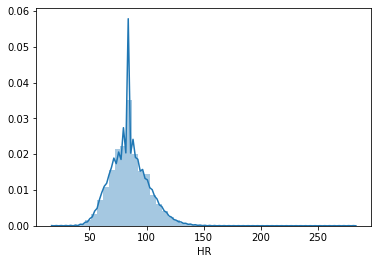

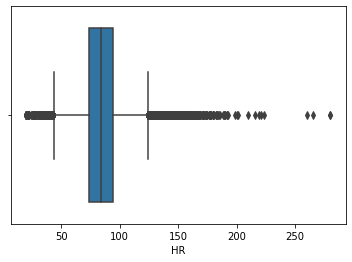

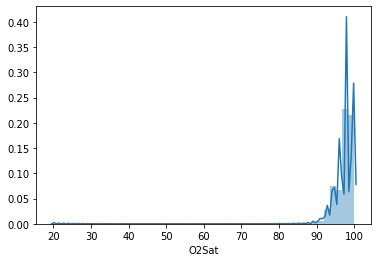

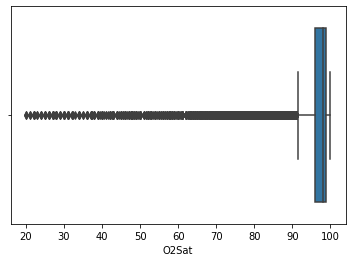

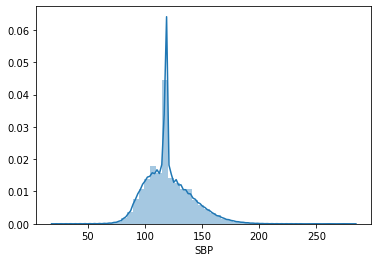

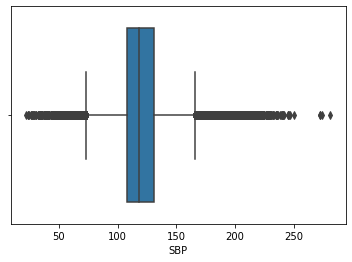

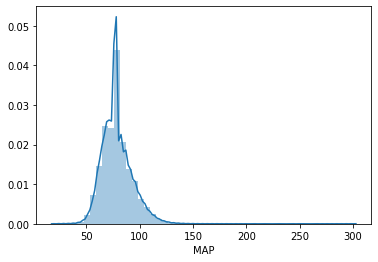

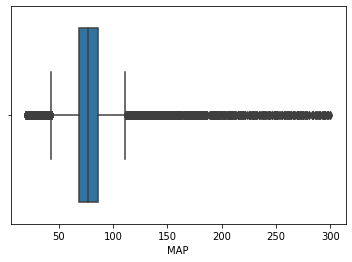

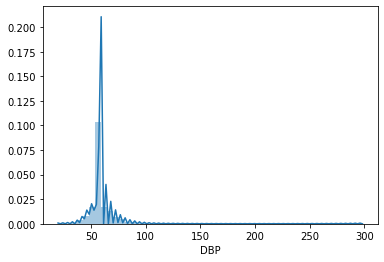

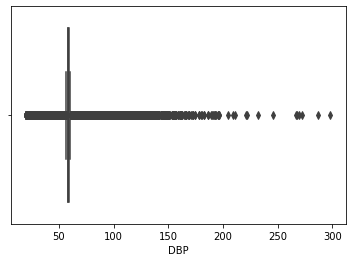

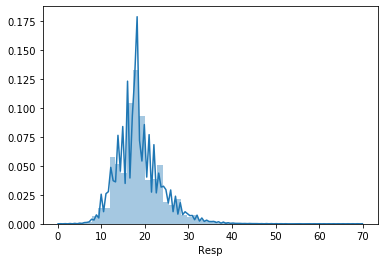

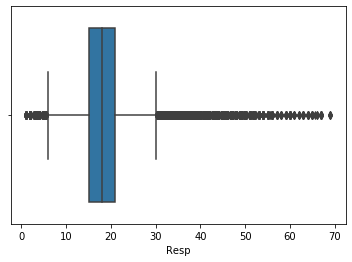

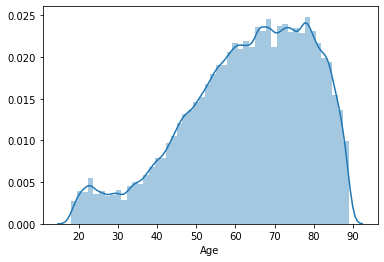

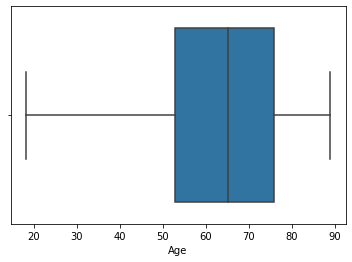

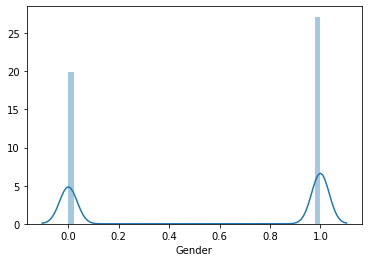

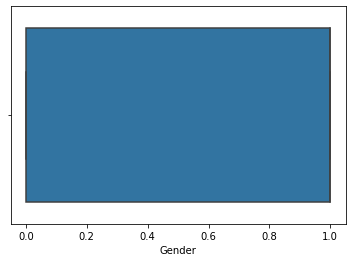

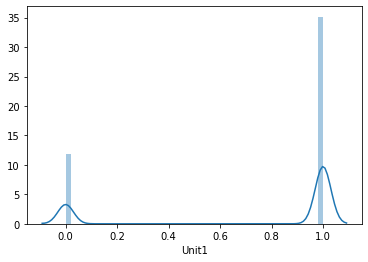

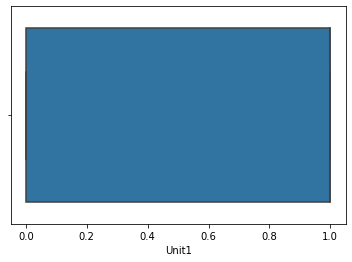

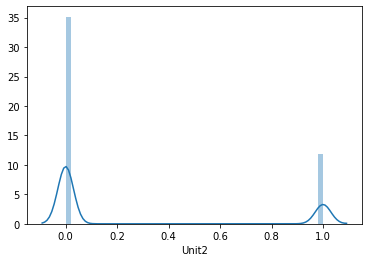

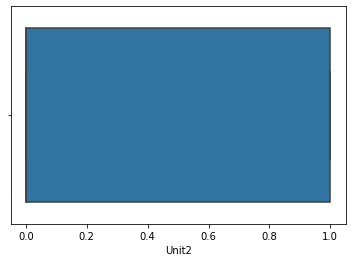

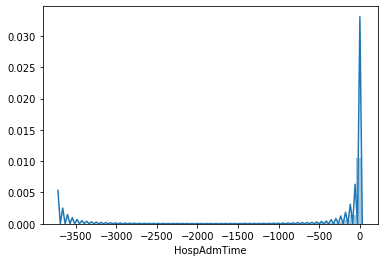

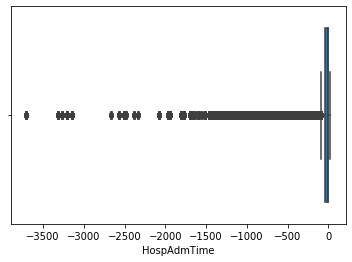

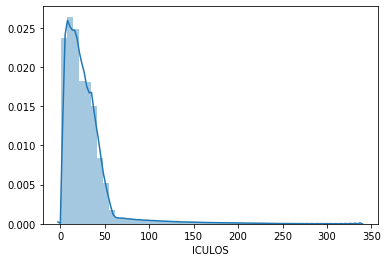

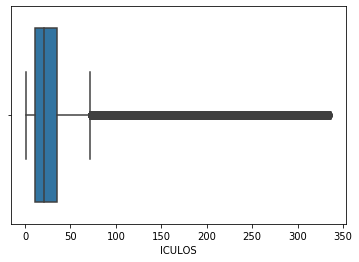

<Figure size 432x288 with 0 Axes>

In [16]:
#finding the distibution

for i in column_to_use:
    if i == "SepsisLabel":
        continue
    print(sns.distplot(finaldata[i]))
    plt.figure()
    print(sns.boxplot(finaldata[i]))
    plt.figure()

In [21]:
X = finaldata.iloc[:,0:12]
y = finaldata.iloc[:,12]

finaldata.shape

(790215, 13)

In [22]:
#Split the data into training set and testing set----------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


After OverSampling, the shape of train_X: (1159384, 12)
After OverSampling, the shape of train_y: (1159384,) 

After OverSampling, counts of label '1': 579692
After OverSampling, counts of label '0': 579692


In [26]:
rb = RandomForestClassifier(n_jobs=-1)
rb.fit(X_train, y_train)
y_pred = rb.predict(X_test)

In [27]:
#Compute the accuracy and confusion matrix----------------------------
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))

[[193008    379]
 [  2951   1216]]


In [28]:
print(accuracy_score(y_test,y_pred))

0.9831438492766534


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    193387
           1       0.76      0.29      0.42      4167

    accuracy                           0.98    197554
   macro avg       0.87      0.64      0.71    197554
weighted avg       0.98      0.98      0.98    197554



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


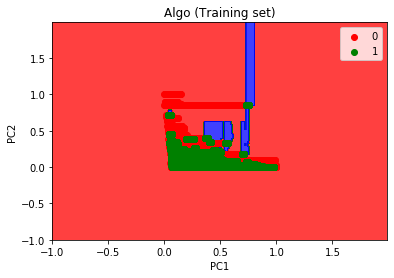

In [31]:
'''
#Plot the decision boundary, visualize training and test results----------------------------
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import MultinomialNB,GaussianNB
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)


# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Algo (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
'''